## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [1]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
!pip install -q mmcv terminaltables

In [16]:
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'

Cloning into 'mmdetection'...
remote: Enumerating objects: 29291, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 29291 (delta 54), reused 61 (delta 20), pack-reused 29134
Receiving objects: 100% (29291/29291), 39.68 MiB | 29.19 MiB/s, done.
Resolving deltas: 100% (20914/20914), done.
Note: switching to '0f33c08d8d46eba8165715a0995841a975badfd4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [3]:
%cd "mmdetection"

/home/toan/Go5-Project/table_detection/mmdetection


In [4]:
!pip install -r "/home/toan/Go5-Project/table_detection/mmdetection/requirements/optional.txt"

In [5]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying mmdet/version.py -> build/lib.linux-x86_64-3.7/mmdet
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/core
creating build/bdist.linux-x86_64/egg/mmdet/core/bbox
copying build/lib.linux-x86_64-3.7/mmdet/core/bbox/transforms.py -> build/bdist.linux-x86_64/egg/mmdet/core/bbox
creating build/bdist.linux-x86_64/egg/mmdet/core/bbox/assigners
copying build/lib.linux-x86_64-3.7/mmdet/core/bbox/assigners/point_assigner.py -> build/bdist.linux-x86_64/eg

In [6]:
!python setup.py develop

running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.7/mmdet/ops/utils/compiling_info.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/utils
copying build/lib.linux-x86_64-3.7/mmdet/ops/nms/nms_cpu.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.7/mmdet/ops/nms/nms_cuda.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.7/mmdet/ops/roi_align/roi_align_cuda.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86_64-3.7/mmdet/ops/roi_pool/roi_pool_cuda.cpython-37m-x86_64-linux-gnu.so -> mmdet/ops/roi_pool
copying build/lib.linux-x86_64-3.7/mmdet/ops/dcn/deform_conv_cuda.

In [7]:
!pip install -r {"requirements.txt"}

In [8]:
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3

In [14]:
!pip install -r requirements.txt

  Using cached pathlib-1.0.1-py3-none-any.whl (14 kB)


In [10]:
%cd /home/toan/Go5-Project/table_detection
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

/home/toan/Go5-Project/table_detection
Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 2. Clone the Repository 


## 3. Download the Pretrained Model

In [32]:
!gdown "https://drive.google.com/u/0/uc?id=1-mVr4UBicFk3mjUz5tsVPjQ4jzRtiT7V&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-mVr4UBicFk3mjUz5tsVPjQ4jzRtiT7V&export=download
To: /home/toan/Go5-Project/table_detection/epoch_1.pth
100%|█████████████████████████████████████████| 664M/664M [00:05<00:00, 122MB/s]


## 4. Load Data

/home/toan/Go5-Project/table_detection


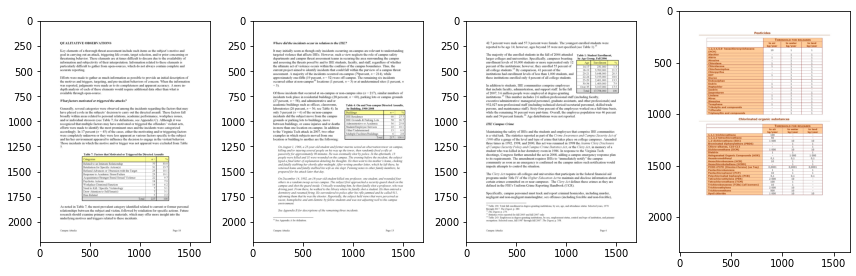

In [98]:
# load data
%cd /home/toan/Go5-Project/table_detection
%matplotlib inline
import matplotlib.pyplot as plt 
import glob
from PIL import Image

fig, axs = plt.subplots(1, 4, figsize=(12, 12))
i = 0

#data path
path = ("data/images/")
data = glob.glob(path + "*.jpg")[:4]
for image in data:
    image = Image.open(image).convert("RGB")
    axs[i].imshow(image)
    i += 1
plt.tight_layout()

## 5. Load Model and Checkpoint

In [66]:
import os
from pathlib import Path
import cv2
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result
import mmcv
import numpy as np
import math
from numpy import array, float32, size
from PIL import Image


config_file = "/home/toan/Go5-Project/table_detection/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py"
checkpoint_file = "/home/toan/Go5-Project/table_detection/epoch_1.pth"
    
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [34]:
def return_table(table_coordinates):

    tables_dict = []

    for table_data in table_coordinates:
        table_dict = {
            "name" : "table",
            "xmin" : table_data[0],
            "ymin" : table_data[1],
            "xmax" : table_data[2],
            "ymax" : table_data[3]
        }

        tables_dict.append(table_dict)
  
    return tables_dict

## 6. Run the model on a Sample Image

{'name': 'table', 'xmin': 264, 'ymin': 1170, 'xmax': 1386, 'ymax': 1674}
{'name': 'table', 'xmin': 266, 'ymin': 1742, 'xmax': 1383, 'ymax': 2077}
{'name': 'table', 'xmin': 262, 'ymin': 825, 'xmax': 1390, 'ymax': 1089}


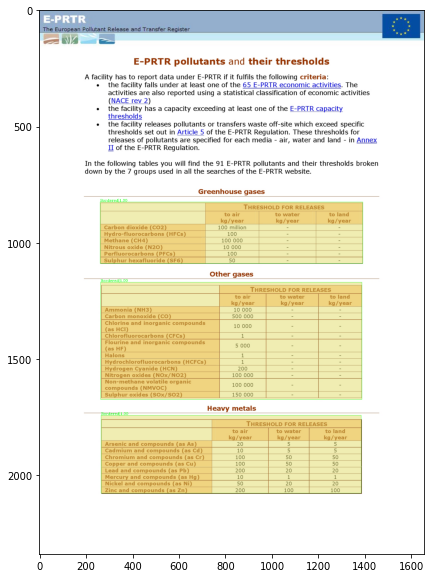

In [109]:
#image path
img = "/home/toan/Go5-Project/table_detection/data/images/eu-0010001.jpg"

# Run Inference
result = inference_detector(model, img)

table_coordinates = []

## extracting bordered tables
for bordered_tables in result[0][0]:
    table_coordinates.append(bordered_tables[:4].astype(int))

## extracting borderless tables
for borderless_tables in result[0][2]:
    table_coordinates.append(borderless_tables[:4].astype(int))
    

table_data = return_table(table_coordinates)

show_result(img, result, ('Bordered', 'Cell', 'Borderless'), out_file ='test.jpg')
show_result_pyplot(img, result,('Bordered', 'Cell', 'Borderless'), score_thr=0.70)


for i in table_data:
    print(i)


## 7. Run Inference for dataset and save 

In [130]:
for img in glob.glob('data/images/*.jpg')[::]:

    result = inference_detector(model, img)

    table_coordinates = []

    ## extracting bordered tables
    for bordered_tables in result[0][0]:
        table_coordinates.append(bordered_tables[:4].astype(int))

    ## extracting borderless tables
    for borderless_tables in result[0][2]:
        table_coordinates.append(borderless_tables[:4].astype(int))
    


    image_name = "visualised_data/" + img[12:22] + "_result.jpg"
    table_data = return_table(table_coordinates)
    
    print("table data")
    print(table_data)

    if len(table_data) == 0:
        im1 = Image.open(img) 
  
    # save a image using extension
        im1 = im1.save(image_name)
    else:
        show_result(img, result, ('Bordered', 'Cell', 'Borderless'), out_file = image_name)



table data
[{'name': 'table', 'xmin': 417, 'ymin': 1342, 'xmax': 1282, 'ymax': 1786}]
table data
[{'name': 'table', 'xmin': 909, 'ymin': 885, 'xmax': 1511, 'ymax': 1176}]
table data
[{'name': 'table', 'xmin': 1097, 'ymin': 387, 'xmax': 1515, 'ymax': 714}]
table data
[{'name': 'table', 'xmin': 266, 'ymin': 1083, 'xmax': 1386, 'ymax': 1783}, {'name': 'table', 'xmin': 265, 'ymin': 259, 'xmax': 1388, 'ymax': 1001}]
table data
[{'name': 'table', 'xmin': 155, 'ymin': 263, 'xmax': 1008, 'ymax': 1366}]
table data
[{'name': 'table', 'xmin': 199, 'ymin': 637, 'xmax': 1458, 'ymax': 1188}]
table data
[]
table data
[{'name': 'table', 'xmin': 217, 'ymin': 319, 'xmax': 1401, 'ymax': 833}, {'name': 'table', 'xmin': 197, 'ymin': 1535, 'xmax': 1452, 'ymax': 1765}]
table data
[{'name': 'table', 'xmin': 580, 'ymin': 504, 'xmax': 1061, 'ymax': 921}]
table data
[{'name': 'table', 'xmin': 152, 'ymin': 202, 'xmax': 1012, 'ymax': 1191}]
table data
[{'name': 'table', 'xmin': 187, 'ymin': 1079, 'xmax': 1506, 'ym